In [1]:
import pandas as pd 
import mlrose_hiive as rose
import numpy as np 
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner,MIMICRunner
##from mlrose_hiive.runners._runner_base import _RunnerBase
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split,validation_curve,learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import category_encoders
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
#from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import time 
import warnings
warnings.filterwarnings("ignore")

In [2]:
def run_RHC(problem):
    rhc= RHCRunner(problem=problem,experiment_name='four_peak_rhc',output_directory=None,
                    seed=123,
                    iteration_list=2 ** np.arange(11),
                    max_attempts=500,
                    restart_list=[25,100]) 


    rhc_df_run_stats, rhc_df_run_curves = rhc.run()
    return rhc_df_run_stats,rhc_df_run_curves


def run_SA(problem):

    sa = SARunner(problem=problem,
              experiment_name='four_peak_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=123,
              iteration_list=2 ** np.arange(11),
              max_attempts=500,
              temperature_list=[0.1, 0.25,0.5, 0.75, 2.0, 5.0],
              decay_list=[rose.GeomDecay])

    sa_df_run_stats, sa_df_run_curves = sa.run()
    return sa_df_run_stats,sa_df_run_curves
def run_GA(problem):
    ga = GARunner(problem=problem,
              experiment_name='four_peak_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[10, 20, 50],
              mutation_rates=[0.1, 0.2, 0.5])

    ga_df_run_stats, ga_df_run_curves = ga.run()
    return ga_df_run_stats,ga_df_run_curves


def run_mimic(problem):
    mmc= MIMICRunner(problem=problem,
                        experiment_name='four_peak_mmc',
                        output_directory=None,
                        seed=123,
                        iteration_list=2 ** np.arange(11),
                        max_attempts=500,population_sizes=[1,5,10,50,100],
                        keep_percent_list=[0.25, 0.5, 0.75,1])
    mmc_df_run_stats, mmc_df_run_curves = mmc.run()
    return mmc_df_run_stats, mmc_df_run_curves


In [3]:
Problem1=rose.FourPeaks(t_pct=0.15)
problem = rose.DiscreteOpt(length = 15, fitness_fn = Problem1, maximize = True, max_val = 8)

fourpeak_rhc_df_run_stats,fourpeak_rhc_df_run_curves =run_RHC(problem)
fourpeak_rhc_highest_fitness=fourpeak_rhc_df_run_curves[fourpeak_rhc_df_run_curves.Fitness==fourpeak_rhc_df_run_curves.Fitness.max()]
print(fourpeak_rhc_df_run_curves.Fitness.max())
print('min time is' + str(fourpeak_rhc_highest_fitness.Time.max()))
fourpeak_sa_df_run_stats,fourpeak_sa_df_run_curves =run_SA(problem)
fourpeak_sa_highest_fitness=fourpeak_sa_df_run_curves[fourpeak_sa_df_run_curves.Fitness==fourpeak_sa_df_run_curves.Fitness.max()]
print(fourpeak_sa_df_run_curves.Fitness.max())
print('min time is' + str(fourpeak_sa_highest_fitness.Time.max()))

fourpeak_ga_df_run_stats,fourpeak_ga_df_run_curves =run_GA(problem)
fourpeak_ga_highest_fitness=fourpeak_ga_df_run_curves[fourpeak_ga_df_run_curves.Fitness==fourpeak_ga_df_run_curves.Fitness.max()]

print(fourpeak_ga_df_run_curves.Fitness.max())
print('min time is' + str(fourpeak_ga_highest_fitness.Time.max()))

fourpeak_mmc_df_run_stats,fourpeak_mmc_df_run_curves =run_mimic(problem)
fourpeak_mmc_highest_fitness=fourpeak_mmc_df_run_curves[fourpeak_mmc_df_run_curves.Fitness==fourpeak_mmc_df_run_curves.Fitness.max()]
print(fourpeak_mmc_df_run_curves.Fitness.max())
print('min time is' + str(fourpeak_mmc_highest_fitness.Time.max()))

15.0
min time is0.2217082910000001
11.0
min time is0.1576809589998902
26.0
min time is0.29858645800004524
3.0
min time is2.5389808749998792


In [4]:
problem = rose.KnapsackGenerator().generate(seed=123,number_of_items_types=200)
Knapsack_rhc_df_run_stats,Knapsack_rhc_df_run_curves =run_RHC(problem)
Knapsack_rhc_highest_fitness=Knapsack_rhc_df_run_curves[Knapsack_rhc_df_run_curves.Fitness==Knapsack_rhc_df_run_curves.Fitness.max()]
print(Knapsack_rhc_df_run_curves.Fitness.max())
print('min time is' + str(Knapsack_rhc_highest_fitness.Time.max()))
Knapsack_sa_df_run_stats,Knapsack_sa_df_run_curves =run_SA(problem)
Knapsack_sa_highest_fitness=Knapsack_sa_df_run_curves[Knapsack_sa_df_run_curves.Fitness==Knapsack_sa_df_run_curves.Fitness.max()]
print(Knapsack_sa_df_run_curves.Fitness.max())
print('min time is' + str(Knapsack_sa_highest_fitness.Time.max()))

Knapsack_ga_df_run_stats,Knapsack_ga_df_run_curves =run_GA(problem)
Knapsack_ga_highest_fitness=Knapsack_ga_df_run_curves[Knapsack_ga_df_run_curves.Fitness==Knapsack_ga_df_run_curves.Fitness.max()]

print(Knapsack_ga_df_run_curves.Fitness.max())
print('min time is' + str(Knapsack_ga_highest_fitness.Time.max()))

Knapsack_mmc_df_run_stats,Knapsack_mmc_df_run_curves =run_mimic(problem)
Knapsack_mmc_highest_fitness=Knapsack_mmc_df_run_curves[Knapsack_mmc_df_run_curves.Fitness==Knapsack_mmc_df_run_curves.Fitness.max()]
print(Knapsack_mmc_df_run_curves.Fitness.max())
print('min time is' + str(Knapsack_mmc_highest_fitness.Time.max()))

3306.0
min time is0.24514683300003526
3273.0
min time is0.22095804199989288
3916.0
min time is0.7481460829999378
3448.0
min time is31.241534458999922


In [5]:
##Problem3=rose.FlipFlop()
problem = rose.FlipFlopGenerator().generate(seed=123,size=35)
ff_rhc_df_run_stats,ff_rhc_df_run_curves =run_RHC(problem)
ff_rhc_highest_fitness=ff_rhc_df_run_curves[ff_rhc_df_run_curves.Fitness==ff_rhc_df_run_curves.Fitness.max()]
print(ff_rhc_df_run_curves.Fitness.max())
print('min time is' + str(ff_rhc_highest_fitness.Time.max()))
ff_sa_df_run_stats,ff_sa_df_run_curves =run_SA(problem)
ff_sa_highest_fitness=ff_sa_df_run_curves[ff_sa_df_run_curves.Fitness==ff_sa_df_run_curves.Fitness.max()]
print(ff_sa_df_run_curves.Fitness.max())
print('min time is' + str(ff_sa_highest_fitness.Time.max()))

ff_ga_df_run_stats,ff_ga_df_run_curves =run_GA(problem)
ff_ga_highest_fitness=ff_ga_df_run_curves[ff_ga_df_run_curves.Fitness==ff_ga_df_run_curves.Fitness.max()]

print(ff_ga_df_run_curves.Fitness.max())
print('min time is' + str(ff_ga_highest_fitness.Time.max()))

ff_mmc_df_run_stats,ff_mmc_df_run_curves =run_mimic(problem)
ff_mmc_highest_fitness=ff_mmc_df_run_curves[ff_mmc_df_run_curves.Fitness==ff_mmc_df_run_curves.Fitness.max()]
print(ff_mmc_df_run_curves.Fitness.max())
print('min time is' + str(ff_mmc_highest_fitness.Time.max()))


32.0
min time is0.16863833400020667
34.0
min time is0.12468454200006818
34.0
min time is0.0322541249997812
31.0
min time is2.042664708000302


In [6]:
'''problem = QueensGenerator().generate(seed=123456, size=25)

Queen_rhc_df_run_stats,Queen_rhc_df_run_curves =run_RHC(problem)
Queen_rhc_highest_fitness=Queen_rhc_df_run_curves[Queen_rhc_df_run_curves.Fitness==Queen_rhc_df_run_curves.Fitness.min()]
print(Queen_rhc_df_run_curves.Fitness.min())
print('min time is' + str(Queen_rhc_highest_fitness.Time.max()))
Queen_sa_df_run_stats,Queen_sa_df_run_curves =run_SA(problem)
Queen_sa_highest_fitness=Queen_sa_df_run_curves[Queen_sa_df_run_curves.Fitness==Queen_sa_df_run_curves.Fitness.min()]
print(Queen_sa_df_run_curves.Fitness.min())
print('min time is' + str(Queen_sa_highest_fitness.Time.max()))

Queen_ga_df_run_stats,Queen_ga_df_run_curves =run_GA(problem)
Queen_ga_highest_fitness=Queen_ga_df_run_curves[Queen_ga_df_run_curves.Fitness==Queen_ga_df_run_curves.Fitness.min()]

print(Queen_ga_df_run_curves.Fitness.min())
print('min time is' + str(Queen_ga_highest_fitness.Time.max()))

Queen_mmc_df_run_stats,Queen_mmc_df_run_curves =run_mimic(problem)
Queen_mmc_highest_fitness=Queen_mmc_df_run_curves[Queen_mmc_df_run_curves.Fitness==Queen_mmc_df_run_curves.Fitness.min()]
print(Queen_mmc_df_run_curves.Fitness.min())
print('min time is' + str(Queen_mmc_highest_fitness.Time.max()))'''

1.0
min time is0.8462221660001887
2.0
min time is0.6415037920005489
1.0
min time is3.5705265830001736
12.0
min time is17.722981541999616


In [7]:
'''problem = TSPGenerator().generate(seed=123456, number_of_cities=30)

TSP_rhc_df_run_stats,TSP_rhc_df_run_curves =run_RHC(problem)
TSP_rhc_highest_fitness=TSP_rhc_df_run_curves[TSP_rhc_df_run_curves.Fitness==TSP_rhc_df_run_curves.Fitness.min()]
print(TSP_rhc_df_run_curves.Fitness.min())
print('min time is' + str(TSP_rhc_highest_fitness.Time.max()))
TSP_sa_df_run_stats,TSP_sa_df_run_curves =run_SA(problem)
TSP_sa_highest_fitness=TSP_sa_df_run_curves[TSP_sa_df_run_curves.Fitness==TSP_sa_df_run_curves.Fitness.min()]
print(TSP_sa_df_run_curves.Fitness.min())
print('min time is' + str(TSP_sa_highest_fitness.Time.max()))

TSP_ga_df_run_stats,TSP_ga_df_run_curves =run_GA(problem)
TSP_ga_highest_fitness=TSP_ga_df_run_curves[TSP_ga_df_run_curves.Fitness==TSP_ga_df_run_curves.Fitness.min()]

print(TSP_ga_df_run_curves.Fitness.min())
print('min time is' + str(TSP_ga_highest_fitness.Time.max()))

TSP_mmc_df_run_stats,TSP_mmc_df_run_curves =run_mimic(problem)
TSP_mmc_highest_fitness=TSP_mmc_df_run_curves[TSP_mmc_df_run_curves.Fitness==TSP_mmc_df_run_curves.Fitness.min()]
print(TSP_mmc_df_run_curves.Fitness.min())
print('min time is' + str(TSP_mmc_highest_fitness.Time.max()))
'''

1374.4969620637785
min time is0.17002954200052045
1300.4988224369292
min time is0.37137983300090127
1209.114770089074
min time is2.3168073750002804
2532.646001960174
min time is27.96947637500125


In [8]:
'''problem = MaxKColorGenerator().generate(seed=123, number_of_nodes=25, max_connections_per_node=13, max_colors=4)


rhc_df_run_stats,rhc_df_run_curves =run_RHC(problem)
rhc_highest_fitness=rhc_df_run_curves[rhc_df_run_curves.Fitness==rhc_df_run_curves.Fitness.min()]
print(rhc_df_run_curves.Fitness.min())
print('min time is' + str(rhc_highest_fitness.Time.max()))
sa_df_run_stats,sa_df_run_curves =run_SA(problem)
sa_highest_fitness=sa_df_run_curves[sa_df_run_curves.Fitness==sa_df_run_curves.Fitness.min()]
print(sa_df_run_curves.Fitness.min())
print('min time is' + str(sa_highest_fitness.Time.max()))

ga_df_run_stats,ga_df_run_curves =run_GA(problem)
ga_highest_fitness=ga_df_run_curves[ga_df_run_curves.Fitness==ga_df_run_curves.Fitness.min()]

print(ga_df_run_curves.Fitness.min())
print('min time is' + str(ga_highest_fitness.Time.max()))

mmc_df_run_stats,mmc_df_run_curves =run_mimic(problem)
mmc_highest_fitness=mmc_df_run_curves[mmc_df_run_curves.Fitness==mmc_df_run_curves.Fitness.min()]
print(mmc_df_run_curves.Fitness.min())
print('min time is' + str(+mmc_highest_fitness.Time.max()))
'''

"problem = MaxKColorGenerator().generate(seed=123, number_of_nodes=25, max_connections_per_node=13, max_colors=4)\n\n\nrhc_df_run_stats,rhc_df_run_curves =run_RHC(problem)\nrhc_highest_fitness=rhc_df_run_curves[rhc_df_run_curves.Fitness==rhc_df_run_curves.Fitness.min()]\nprint(rhc_df_run_curves.Fitness.min())\nprint('min time is' + str(rhc_highest_fitness.Time.max()))\nsa_df_run_stats,sa_df_run_curves =run_SA(problem)\nsa_highest_fitness=sa_df_run_curves[sa_df_run_curves.Fitness==sa_df_run_curves.Fitness.min()]\nprint(sa_df_run_curves.Fitness.min())\nprint('min time is' + str(sa_highest_fitness.Time.max()))\n\nga_df_run_stats,ga_df_run_curves =run_GA(problem)\nga_highest_fitness=ga_df_run_curves[ga_df_run_curves.Fitness==ga_df_run_curves.Fitness.min()]\n\nprint(ga_df_run_curves.Fitness.min())\nprint('min time is' + str(ga_highest_fitness.Time.max()))\n\nmmc_df_run_stats,mmc_df_run_curves =run_mimic(problem)\nmmc_highest_fitness=mmc_df_run_curves[mmc_df_run_curves.Fitness==mmc_df_run_cu

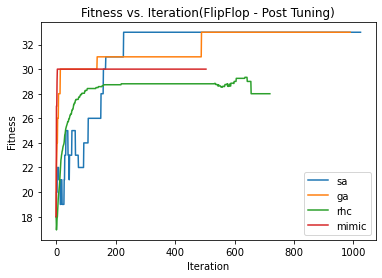

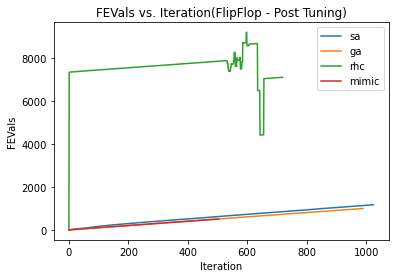

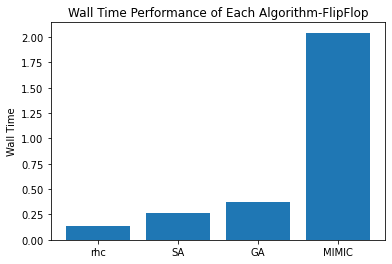

In [67]:
ff_rhc_df_run_curveskeepoptimalonly=ff_rhc_df_run_curves[ff_rhc_df_run_curves['Restarts']==25]
ffrhcgroup=ff_rhc_df_run_curveskeepoptimalonly.groupby(['Restarts','Iteration'])['Fitness'].mean().reset_index()
ffrhcgroupval=ff_rhc_df_run_curveskeepoptimalonly.groupby(['Restarts','Iteration'])['FEvals'].mean().reset_index()

ff_sa_df_run_curves['Temperature']=[str(i) for i in ff_sa_df_run_curves['Temperature']]
ff_sa_df_run_curves['Temperature']=[float(i) for i in ff_sa_df_run_curves['Temperature']]
ff_sa_df_run_curveskeepoptimalonly=ff_sa_df_run_curves[(ff_sa_df_run_curves['Temperature']==2.0)]
ff_ga_df_run_curveskeepoptimalonly=ff_ga_df_run_curves[(ff_ga_df_run_curves['Population Size']==20) & (ff_ga_df_run_curves['Mutation Rate']==0.2)]
ff_mmc_df_run_curveskeepoptimalonly=ff_mmc_df_run_curves[(ff_mmc_df_run_curves['Population Size']==100) & (ff_mmc_df_run_curves['Keep Percent']==0.25)]

plt.figure()

plt.plot(ff_sa_df_run_curveskeepoptimalonly['Iteration'],ff_sa_df_run_curveskeepoptimalonly['Fitness'],label='sa')
plt.plot(ff_ga_df_run_curveskeepoptimalonly['Iteration'],ff_ga_df_run_curveskeepoptimalonly['Fitness'],label='ga')
plt.plot(ffrhcgroup['Iteration'],ffrhcgroup['Fitness'],label='rhc')
plt.plot(ff_mmc_df_run_curveskeepoptimalonly['Iteration'],ff_mmc_df_run_curveskeepoptimalonly['Fitness'],label='mimic')
plt.title("Fitness vs. Iteration(FlipFlop - Post Tuning)")
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.show()
plt.figure()

plt.plot(ff_sa_df_run_curveskeepoptimalonly['Iteration'],ff_sa_df_run_curveskeepoptimalonly['FEvals'],label='sa')
plt.plot(ff_ga_df_run_curveskeepoptimalonly['Iteration'],ff_ga_df_run_curveskeepoptimalonly['FEvals'],label='ga')
plt.plot(ffrhcgroup['Iteration'],ffrhcgroupval['FEvals'],label='rhc')
plt.plot(ff_mmc_df_run_curveskeepoptimalonly['Iteration'],ff_mmc_df_run_curveskeepoptimalonly['FEvals'],label='mimic')
plt.title("FEVals vs. Iteration(FlipFlop - Post Tuning)")
plt.xlabel('Iteration')
plt.ylabel('FEVals')
plt.legend()
plt.show()
barvalue=[ ff_rhc_df_run_curveskeepoptimalonly[ff_rhc_df_run_curveskeepoptimalonly.Fitness==ff_rhc_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max()
, ff_sa_df_run_curveskeepoptimalonly[ff_sa_df_run_curveskeepoptimalonly.Fitness==ff_sa_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max()
,ff_ga_df_run_curveskeepoptimalonly[ff_ga_df_run_curveskeepoptimalonly.Fitness==ff_ga_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max(),
ff_mmc_df_run_curveskeepoptimalonly[ff_mmc_df_run_curveskeepoptimalonly.Fitness==ff_mmc_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max()]
plt.bar( np.arange(len(barvalue)),barvalue)
plt.title("Wall Time Performance of Each Algorithm-FlipFlop")
plt.ylabel('Wall Time')
plt.xticks(np.arange(len(barvalue)),['rhc','SA','GA','MIMIC'])
plt.show()



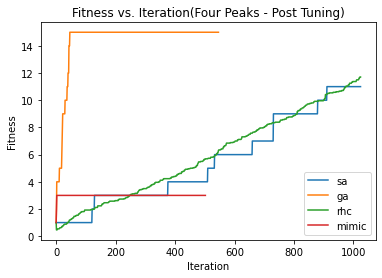

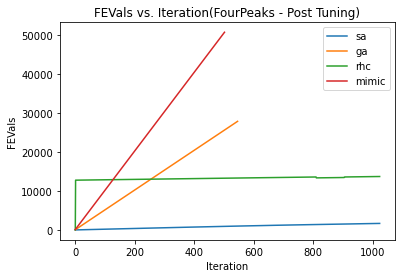

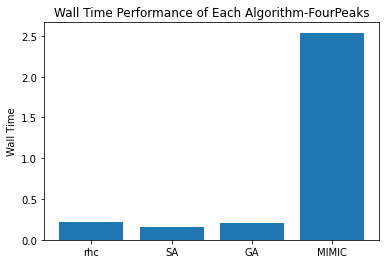

In [63]:
fourpeak_rhc_df_run_curveskeepoptimalonly=fourpeak_rhc_df_run_curves[fourpeak_rhc_df_run_curves['Restarts']==25]
fourpeakrhcgroup=fourpeak_rhc_df_run_curveskeepoptimalonly.groupby(['Restarts','Iteration'])['Fitness'].mean().reset_index()
fourpeakrhcgroupval=fourpeak_rhc_df_run_curveskeepoptimalonly.groupby(['Restarts','Iteration'])['FEvals'].mean().reset_index()

fourpeak_sa_df_run_curves['Temperature']=[str(i) for i in fourpeak_sa_df_run_curves['Temperature']]
fourpeak_sa_df_run_curves['Temperature']=[float(i) for i in fourpeak_sa_df_run_curves['Temperature']]
fourpeak_sa_df_run_curveskeepoptimalonly=fourpeak_sa_df_run_curves[(fourpeak_sa_df_run_curves['Temperature']==0.75)]
fourpeak_ga_df_run_curveskeepoptimalonly=fourpeak_ga_df_run_curves[(fourpeak_ga_df_run_curves['Population Size']==50) & (fourpeak_ga_df_run_curves['Mutation Rate']==0.2)]
fourpeak_mmc_df_run_curveskeepoptimalonly=fourpeak_mmc_df_run_curves[(fourpeak_mmc_df_run_curves['Population Size']==100) & (fourpeak_mmc_df_run_curves['Keep Percent']==0.25)]

plt.figure()

plt.plot(fourpeak_sa_df_run_curveskeepoptimalonly['Iteration'],fourpeak_sa_df_run_curveskeepoptimalonly['Fitness'],label='sa')
plt.plot(fourpeak_ga_df_run_curveskeepoptimalonly['Iteration'],fourpeak_ga_df_run_curveskeepoptimalonly['Fitness'],label='ga')
plt.plot(fourpeakrhcgroup['Iteration'],fourpeakrhcgroup['Fitness'],label='rhc')
plt.plot(fourpeak_mmc_df_run_curveskeepoptimalonly['Iteration'],fourpeak_mmc_df_run_curveskeepoptimalonly['Fitness'],label='mimic')
plt.title("Fitness vs. Iteration(Four Peaks - Post Tuning)")
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.show()
plt.plot(fourpeak_sa_df_run_curveskeepoptimalonly['Iteration'],fourpeak_sa_df_run_curveskeepoptimalonly['FEvals'],label='sa')
plt.plot(fourpeak_ga_df_run_curveskeepoptimalonly['Iteration'],fourpeak_ga_df_run_curveskeepoptimalonly['FEvals'],label='ga')
plt.plot(fourpeakrhcgroup['Iteration'],fourpeakrhcgroupval['FEvals'],label='rhc')
plt.plot(fourpeak_mmc_df_run_curveskeepoptimalonly['Iteration'],fourpeak_mmc_df_run_curveskeepoptimalonly['FEvals'],label='mimic')
plt.title("FEVals vs. Iteration(FourPeaks - Post Tuning)")
plt.xlabel('Iteration')
plt.ylabel('FEVals')
plt.legend()
plt.show()

barvalue=[ fourpeak_rhc_df_run_curveskeepoptimalonly[fourpeak_rhc_df_run_curveskeepoptimalonly.Fitness==fourpeak_rhc_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max()
,fourpeak_sa_df_run_curveskeepoptimalonly[fourpeak_sa_df_run_curveskeepoptimalonly.Fitness==fourpeak_sa_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max()
,fourpeak_ga_df_run_curveskeepoptimalonly[fourpeak_ga_df_run_curveskeepoptimalonly.Fitness==fourpeak_ga_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max(),
fourpeak_mmc_df_run_curveskeepoptimalonly[fourpeak_mmc_df_run_curveskeepoptimalonly.Fitness==fourpeak_mmc_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max()]
plt.bar( np.arange(len(barvalue)),barvalue)
plt.title("Wall Time Performance of Each Algorithm-FourPeaks")
plt.ylabel('Wall Time')
plt.xticks(np.arange(len(barvalue)),['rhc','SA','GA','MIMIC'])
plt.show()


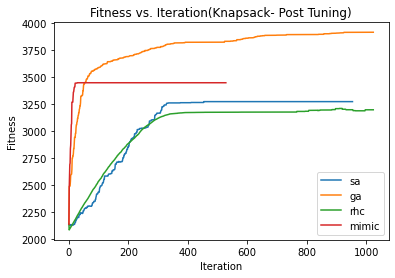

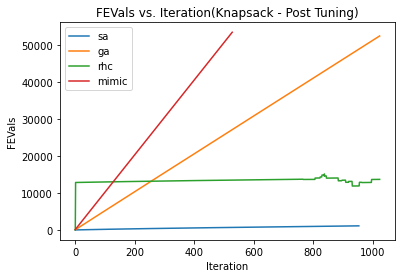

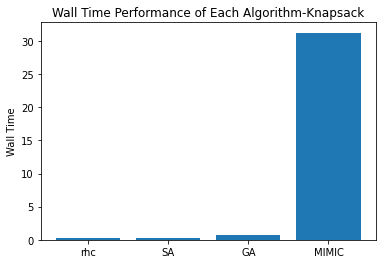

In [66]:
Knapsack_rhc_df_run_curveskeepoptimalonly=Knapsack_rhc_df_run_curves[Knapsack_rhc_df_run_curves['Restarts']==25]
Knapsackrhcgroup=Knapsack_rhc_df_run_curveskeepoptimalonly.groupby(['Restarts','Iteration'])['Fitness'].mean().reset_index()
Knapsackrhcgroupval=Knapsack_rhc_df_run_curveskeepoptimalonly.groupby(['Restarts','Iteration'])['FEvals'].mean().reset_index()

Knapsack_sa_df_run_curves['Temperature']=[str(i) for i in Knapsack_sa_df_run_curves['Temperature']]
Knapsack_sa_df_run_curves['Temperature']=[float(i) for i in Knapsack_sa_df_run_curves['Temperature']]
Knapsack_sa_df_run_curveskeepoptimalonly=Knapsack_sa_df_run_curves[(Knapsack_sa_df_run_curves['Temperature']==5.0)]
Knapsack_ga_df_run_curveskeepoptimalonly=Knapsack_ga_df_run_curves[(Knapsack_ga_df_run_curves['Population Size']==50) & (Knapsack_ga_df_run_curves['Mutation Rate']==0.5)]
Knapsack_mmc_df_run_curveskeepoptimalonly=Knapsack_mmc_df_run_curves[(Knapsack_mmc_df_run_curves['Population Size']==100) & (Knapsack_mmc_df_run_curves['Keep Percent']==0.5)]

plt.figure()

plt.plot(Knapsack_sa_df_run_curveskeepoptimalonly['Iteration'],Knapsack_sa_df_run_curveskeepoptimalonly['Fitness'],label='sa')
plt.plot(Knapsack_ga_df_run_curveskeepoptimalonly['Iteration'],Knapsack_ga_df_run_curveskeepoptimalonly['Fitness'],label='ga')
plt.plot(Knapsackrhcgroup['Iteration'],Knapsackrhcgroup['Fitness'],label='rhc')
plt.plot(Knapsack_mmc_df_run_curveskeepoptimalonly['Iteration'],Knapsack_mmc_df_run_curveskeepoptimalonly['Fitness'],label='mimic')
plt.title("Fitness vs. Iteration(Knapsack- Post Tuning)")
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.show()
plt.plot(Knapsack_sa_df_run_curveskeepoptimalonly['Iteration'],Knapsack_sa_df_run_curveskeepoptimalonly['FEvals'],label='sa')
plt.plot(Knapsack_ga_df_run_curveskeepoptimalonly['Iteration'],Knapsack_ga_df_run_curveskeepoptimalonly['FEvals'],label='ga')
plt.plot(Knapsackrhcgroupval['Iteration'],Knapsackrhcgroupval['FEvals'],label='rhc')
plt.plot(Knapsack_mmc_df_run_curveskeepoptimalonly['Iteration'],Knapsack_mmc_df_run_curveskeepoptimalonly['FEvals'],label='mimic')
plt.title("FEVals vs. Iteration(Knapsack - Post Tuning)")
plt.xlabel('Iteration')
plt.ylabel('FEVals')
plt.legend()
plt.show()

barvalue=[ Knapsack_rhc_df_run_curveskeepoptimalonly[Knapsack_rhc_df_run_curveskeepoptimalonly.Fitness==Knapsack_rhc_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max()
,Knapsack_sa_df_run_curveskeepoptimalonly[Knapsack_sa_df_run_curveskeepoptimalonly.Fitness==Knapsack_sa_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max()
,Knapsack_ga_df_run_curveskeepoptimalonly[Knapsack_ga_df_run_curveskeepoptimalonly.Fitness==Knapsack_ga_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max(),
Knapsack_mmc_df_run_curveskeepoptimalonly[Knapsack_mmc_df_run_curveskeepoptimalonly.Fitness==Knapsack_mmc_df_run_curveskeepoptimalonly.Fitness.max()]['Time'].max()]
plt.bar( np.arange(len(barvalue)),barvalue)
plt.title("Wall Time Performance of Each Algorithm-Knapsack")
plt.ylabel('Wall Time')
plt.xticks(np.arange(len(barvalue)),['rhc','SA','GA','MIMIC'])
plt.show()
